In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from jupyterworkflow.data import get_url_data
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import datetime

# Load data

In [2]:
%%time
data = get_url_data()

...loading csv
CPU times: user 26.6 s, sys: 1.8 s, total: 28.4 s
Wall time: 28.7 s


In [8]:
print('Number of observations: {:,.0f}'.format(len(data)))

Number of observations: 1,752,311


In [30]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-14 18:00:00,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
2010-01-25 23:00:00,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2013-03-19 20:30:00,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
2010-11-11 18:00:00,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
2014-01-11 23:00:00,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [112]:
# generate counts for timestamps 
data_time = data['Time Occurred'].groupby(data.index.floor('1min')).agg([ 'count'])
data_time.head()

,count
Date,
2010-01-01 02:40:00,1
2010-01-01 02:45:00,1
2010-01-01 02:50:00,3
2010-01-01 02:55:00,1
2010-01-01 03:00:00,16


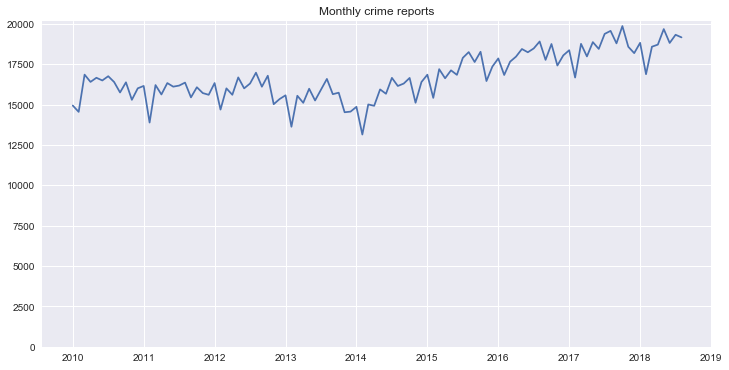

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
title = 'Monthly crime reports'
data_time[data_time.index<='2018-09-01'].resample('M').sum().plot(ax=ax, legend=None, title = title );
plt.ylim(0,None)
plt.xlabel('');

In [113]:
pivoted = data_time.pivot_table('count', index=data_time.index.floor('1min').time, columns=data_time.index.date, fill_value=0)
pivoted.head()

,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-09,2010-01-10,...,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21,2018-09-22
02:40:00,1,1,1,1,0,0,0,0,1,1,...,1,0,1,3,0,0,0,1,0,0
02:41:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
02:42:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02:43:00,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
02:44:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


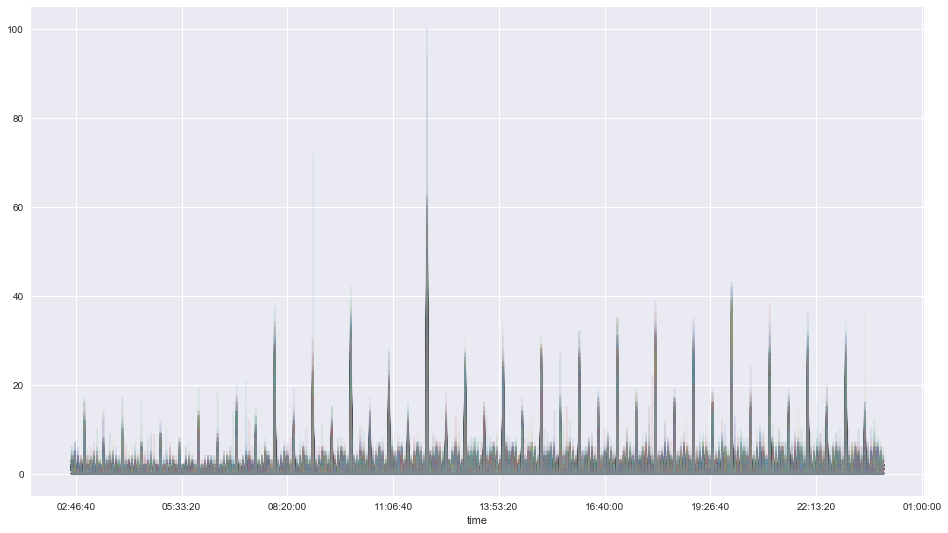

In [114]:
pivoted.plot(legend=False, alpha = 0.1, figsize=(16,9));

# PCA analysis 

In [115]:
# create PCA object
pca= PCA()

In [116]:
# observations in rows 

# calculate loading scores and variation each principle compenent acount for 
scaled_data = pivoted.T
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [117]:
# generate coordinates based on loading scores and scaled data
pca_data = pca.transform(scaled_data)

In [118]:
# scree plot
# generate percentage that each PCA accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# generate labels for scree plot
labels = ['PC' + str(num) for num in range(1, len(per_var) + 1)]

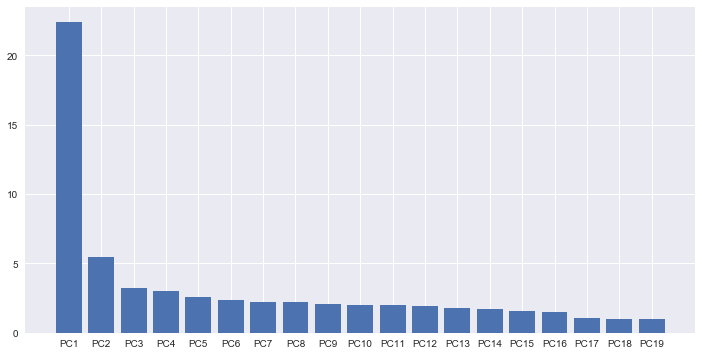

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.bar(left=range(1, 20), height = per_var[0:19], tick_label=labels[0:19])
plt.show()

In [120]:
# generate df with pca coordinates, variables are presented as rows, thus the index should be variable names, the columns represent the different PCA axis 
pca_df = pd.DataFrame(pca_data, index = pivoted.T.index.values,columns=labels)

In [121]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1270,PC1271,PC1272,PC1273,PC1274,PC1275,PC1276,PC1277,PC1278,PC1279
2010-01-01,-41.819504,14.832227,1.854705,1.848963,7.666692,-2.052669,2.652986,5.451690,-2.953533,-4.152264,...,0.011079,-0.001577,0.014544,-0.024074,-0.015842,0.014188,-0.021957,0.006099,0.018051,-0.008952
2010-01-02,-36.036983,1.191874,1.321181,-5.386128,5.016766,-2.640350,-5.122088,1.040721,3.007911,-3.540779,...,-0.006382,-0.003092,-0.011282,-0.011399,0.004344,-0.003251,0.032977,0.020553,-0.014185,0.022628
2010-01-03,-35.107068,3.321878,2.320043,0.538164,-5.586866,-1.113925,2.815942,-2.357369,1.097070,-2.961003,...,0.028801,0.002061,0.057194,-0.062569,-0.014293,-0.007188,0.010621,0.011211,-0.003607,-0.028950
2010-01-04,-21.190591,2.371287,-3.727759,7.706574,4.497854,-2.191603,-2.753918,1.111115,7.524000,-1.789117,...,-0.002760,-0.031298,-0.001464,-0.041109,-0.003025,0.002642,-0.017369,0.020429,-0.009790,0.013661
2010-01-05,-17.520368,-0.750601,-4.142157,1.045330,-0.683569,-3.469763,-1.979473,-8.150828,7.128708,3.226060,...,-0.067209,-0.017570,0.001053,-0.064628,-0.034617,0.038550,0.056925,-0.027756,-0.007002,0.025410


In [122]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

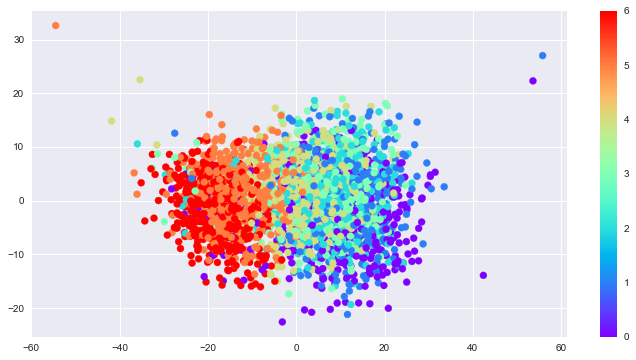

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.scatter(pca_df['PC1'],pca_df['PC2'], c = day_of_week, cmap='rainbow');
plt.colorbar();

In [124]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(scaled_data)
labels = gmm.predict(scaled_data)
labels

array([1, 1, 1, ..., 1, 1, 1])

# Weekend behaviors 

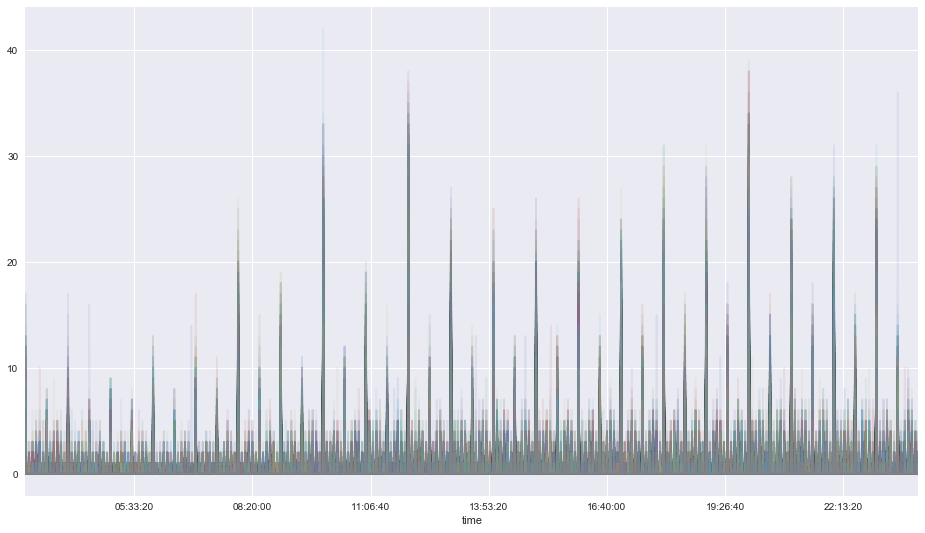

In [150]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.1,  figsize=(16,9));
plt.xlim(datetime.time(3, 0),datetime.time(23, 59));

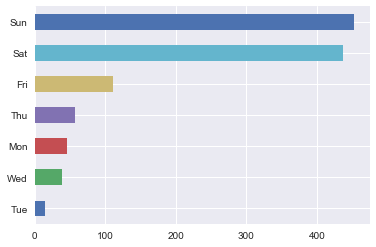

In [147]:
# Isolates weekdays
pd.Series(pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')).value_counts()[::-1].plot(kind='barh');

# Weekday behaviors

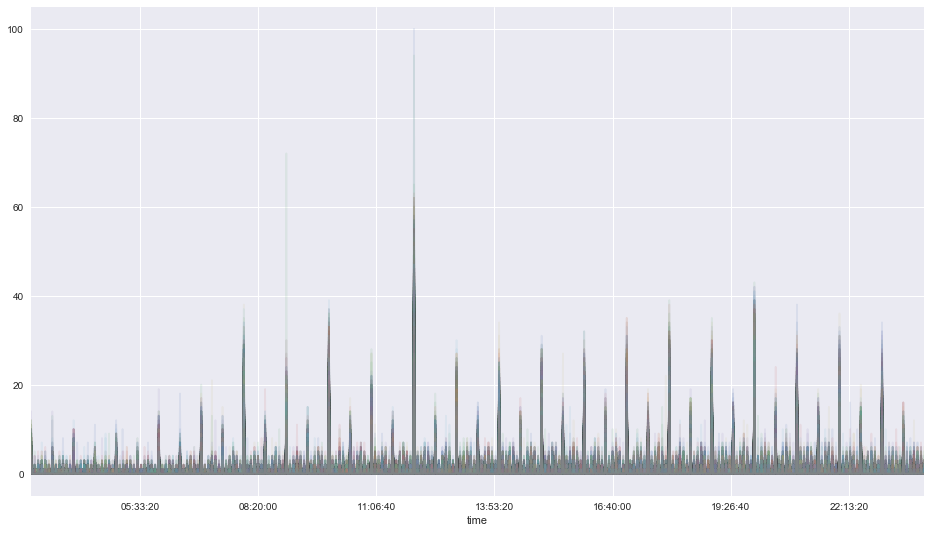

In [151]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==0].T.plot(legend=False, alpha = 0.1,  figsize=(16,9));
plt.xlim(datetime.time(3, 0),datetime.time(23, 59));

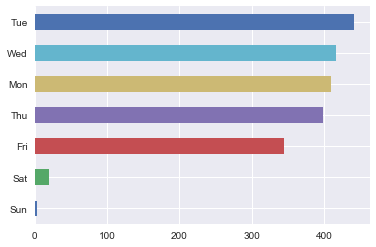

In [128]:
# Isolates weekends
pd.Series(pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')).value_counts()[::-1].plot(kind='barh');

In [152]:
# Solve for Tue
Tue_index  = pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')=='Tue'

In [153]:
# All Tuesdays that behave like Weekends 
pd.DatetimeIndex(pivoted.T[labels==1].index)[Tue_index]

DatetimeIndex(['2010-01-05', '2010-01-12', '2010-01-19', '2010-02-23',
               '2010-03-09', '2010-10-12', '2011-02-15', '2011-02-22',
               '2012-12-25', '2013-01-01', '2013-12-24', '2014-07-01',
               '2017-07-04', '2018-09-18'],
              dtype='datetime64[ns]', freq=None)

In [154]:
# Solve for Sun
Sun_index  = pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')=='Sun'

In [155]:
# All Sundays that behave like Weekdays
pd.DatetimeIndex(pivoted.T[labels==0].index)[Sun_index]

DatetimeIndex(['2015-10-18', '2017-04-30', '2017-10-22'], dtype='datetime64[ns]', freq=None)